#0. DATASET CONTEXT


This dataset is from [an airline satisfaction survey](https:drive.google.com/file/d/1oKFnhKBtO_-eEYenjplsVJAzbcAOYspq/view).

It has the following columns:
- id: it identifies the customer.
- Gender: it indicates the gender of the customer.
- Customer Type: it indicates if the customer is loyal or disloyal.
- Age: it indicates the age of the customer.
- Type of Travel: it indicates if it is a personal or bussiness travel.
- Class: it indicates if the travel is eco, eco plus y bussiness.
- Flight Distance: it indicates the distance traveled.
- Departure Delay in Minutes: it indicates the minutes the departure is delayed.
- Arrival Delay in Minutes: it indicates the minutes the arrival is delayed.
- satisfaction: it indicates if it is satisfied or neutral or dissatisfied.

The following columns are based on a scale from 0 to 5.
- Inflight wifi service: it indicates the satisfaction in this aspect.
- Departure/Arrival time convenient: it indicates the satisfaction.
- Ease of Online booking: it indicates the satisfaction in this aspect.
- Gate location: it indicates the satisfaction in this aspect.
- Food and drink: it indicates the satisfaction in this aspect.
- Online boarding: it indicates the satisfaction in this aspect.
- Seat comfort: it indicates the satisfaction in this aspect.
- Inflight entertainment: it indicates the satisfaction in this aspect.
- On-board service: it indicates the satisfaction in this aspect.
- Leg room service: it indicates the satisfaction in this aspect.
- Baggage handling: it indicates the satisfaction in this aspect.
- Checkin service: it indicates the satisfaction in this aspect.
- Inflight service: it indicates the satisfaction in this aspect.
- Cleanliness: it indicates the satisfaction in this aspect.




The objective of this notebook is the cleaning of this dataset to be able to make the exploratory analysis. After that, the objective would be developing a clasificatory model that is able to predict customer's satisfaction.

#1. LIBRARIES NEEDED

In [118]:
#silent install missingno, no output
%%capture
!pip install missingno

In [119]:
#Essentials libraries
import pandas as pd #Data manipulation
import numpy as np #Numeric operations
import plotly as pl #Interactive visualizations
import seaborn as sns #Graphs
import missingno as msno #Nulls
import matplotlib.pyplot as plt #Boxplots


from sklearn.preprocessing import LabelEncoder, OrdinalEncoder #Feature Engineering

from google.colab import files #export files

#2. DATASET LOAD

In [120]:
#Dataset is loaded
df = pd.read_csv('airline_passenger_satisfaction.csv')

#3. COPY OF THE DATASET

In [121]:
#A copy is made
df_copy = df.copy()

# 4. DATA OVERVIEW

In [122]:
#First rows
df_copy.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [123]:
#Last rows
df_copy.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [124]:
#General info about the dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [125]:
#A statistical summary of numerical variables.
df_copy.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [126]:
#A statistical summary of 'object' variables (categorical variables categórica)
df_copy.describe(include=object)

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [127]:
#Unique values are identified
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for col in categorical_cols:
    print(col, df_copy[col].unique())

Gender ['Male' 'Female']
Customer Type ['Loyal Customer' 'disloyal Customer']
Type of Travel ['Personal Travel' 'Business travel']
Class ['Eco Plus' 'Business' 'Eco']
satisfaction ['neutral or dissatisfied' 'satisfied']


#5. CHECKING DUPLICATES

In [128]:
#We look for duplicates
df_copy.duplicated().sum()

np.int64(0)

There is no duplicates in the dataset now.

#6. ANALYSING NULLS

In [129]:
#Count of nulls per column
missing = df_copy.isna().sum().sort_values(ascending=False)
print(missing)

Arrival Delay in Minutes             310
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Unnamed: 0                             0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Gate location                          0
Ease of Online booking                 0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
Food and drink                         0
On-board service                       0
Leg room service                       0
Checkin service                        0
Baggage handling                       0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
satisfaction    

In [130]:
#Percentage of null values per column
porcentage_missing = (df_copy.isna().mean()*100).sort_values(ascending=False)
print(porcentage_missing)

Arrival Delay in Minutes             0.298352
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Unnamed: 0                           0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Gate location                        0.000000
Ease of Online booking               0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
Food and drink                       0.000000
On-board service                     0.000000
Leg room service                     0.000000
Checkin service                      0.000000
Baggage handling                     0.000000
Inflight service                  

<Axes: >

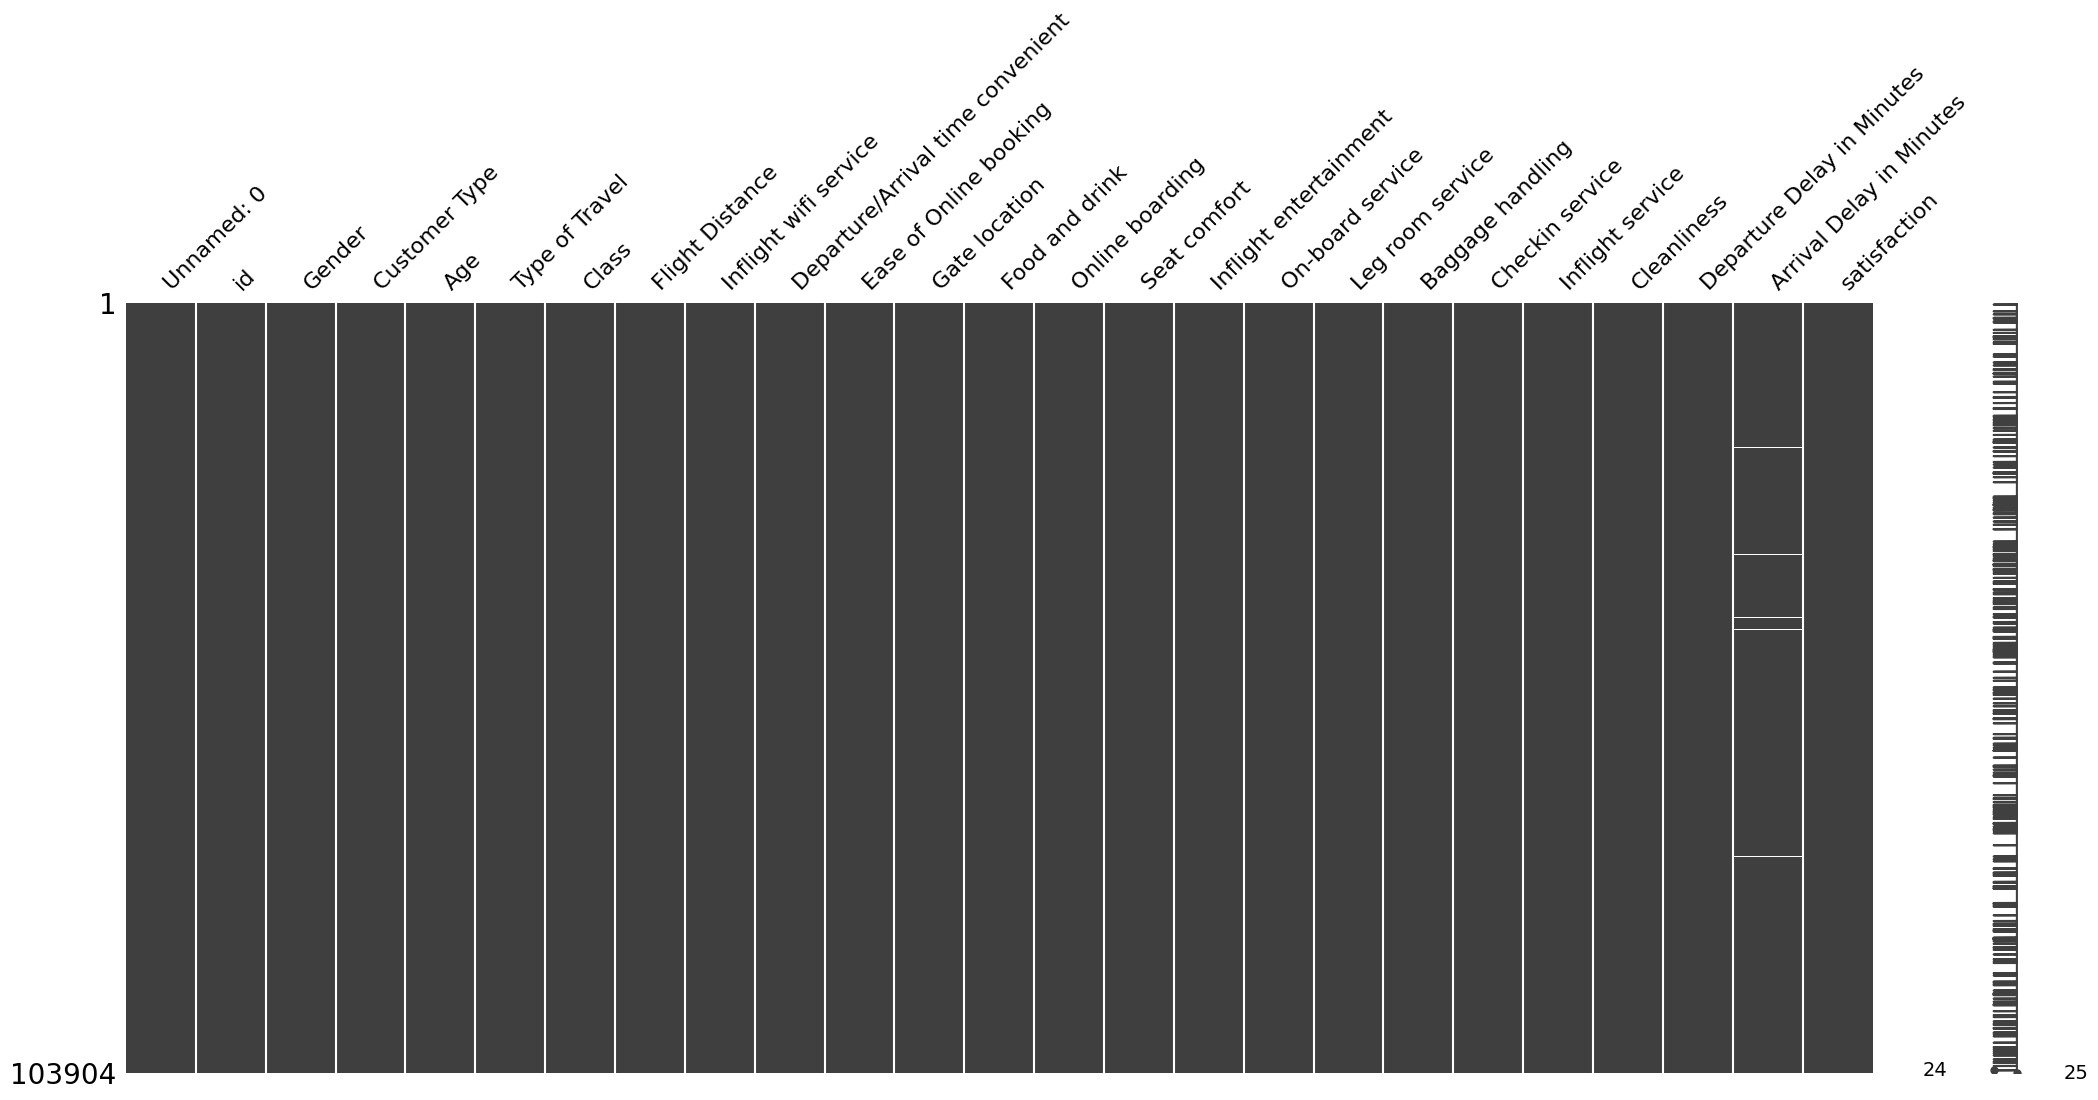

In [131]:
#A way to visualize null values
msno.matrix(df_copy)

<Axes: >

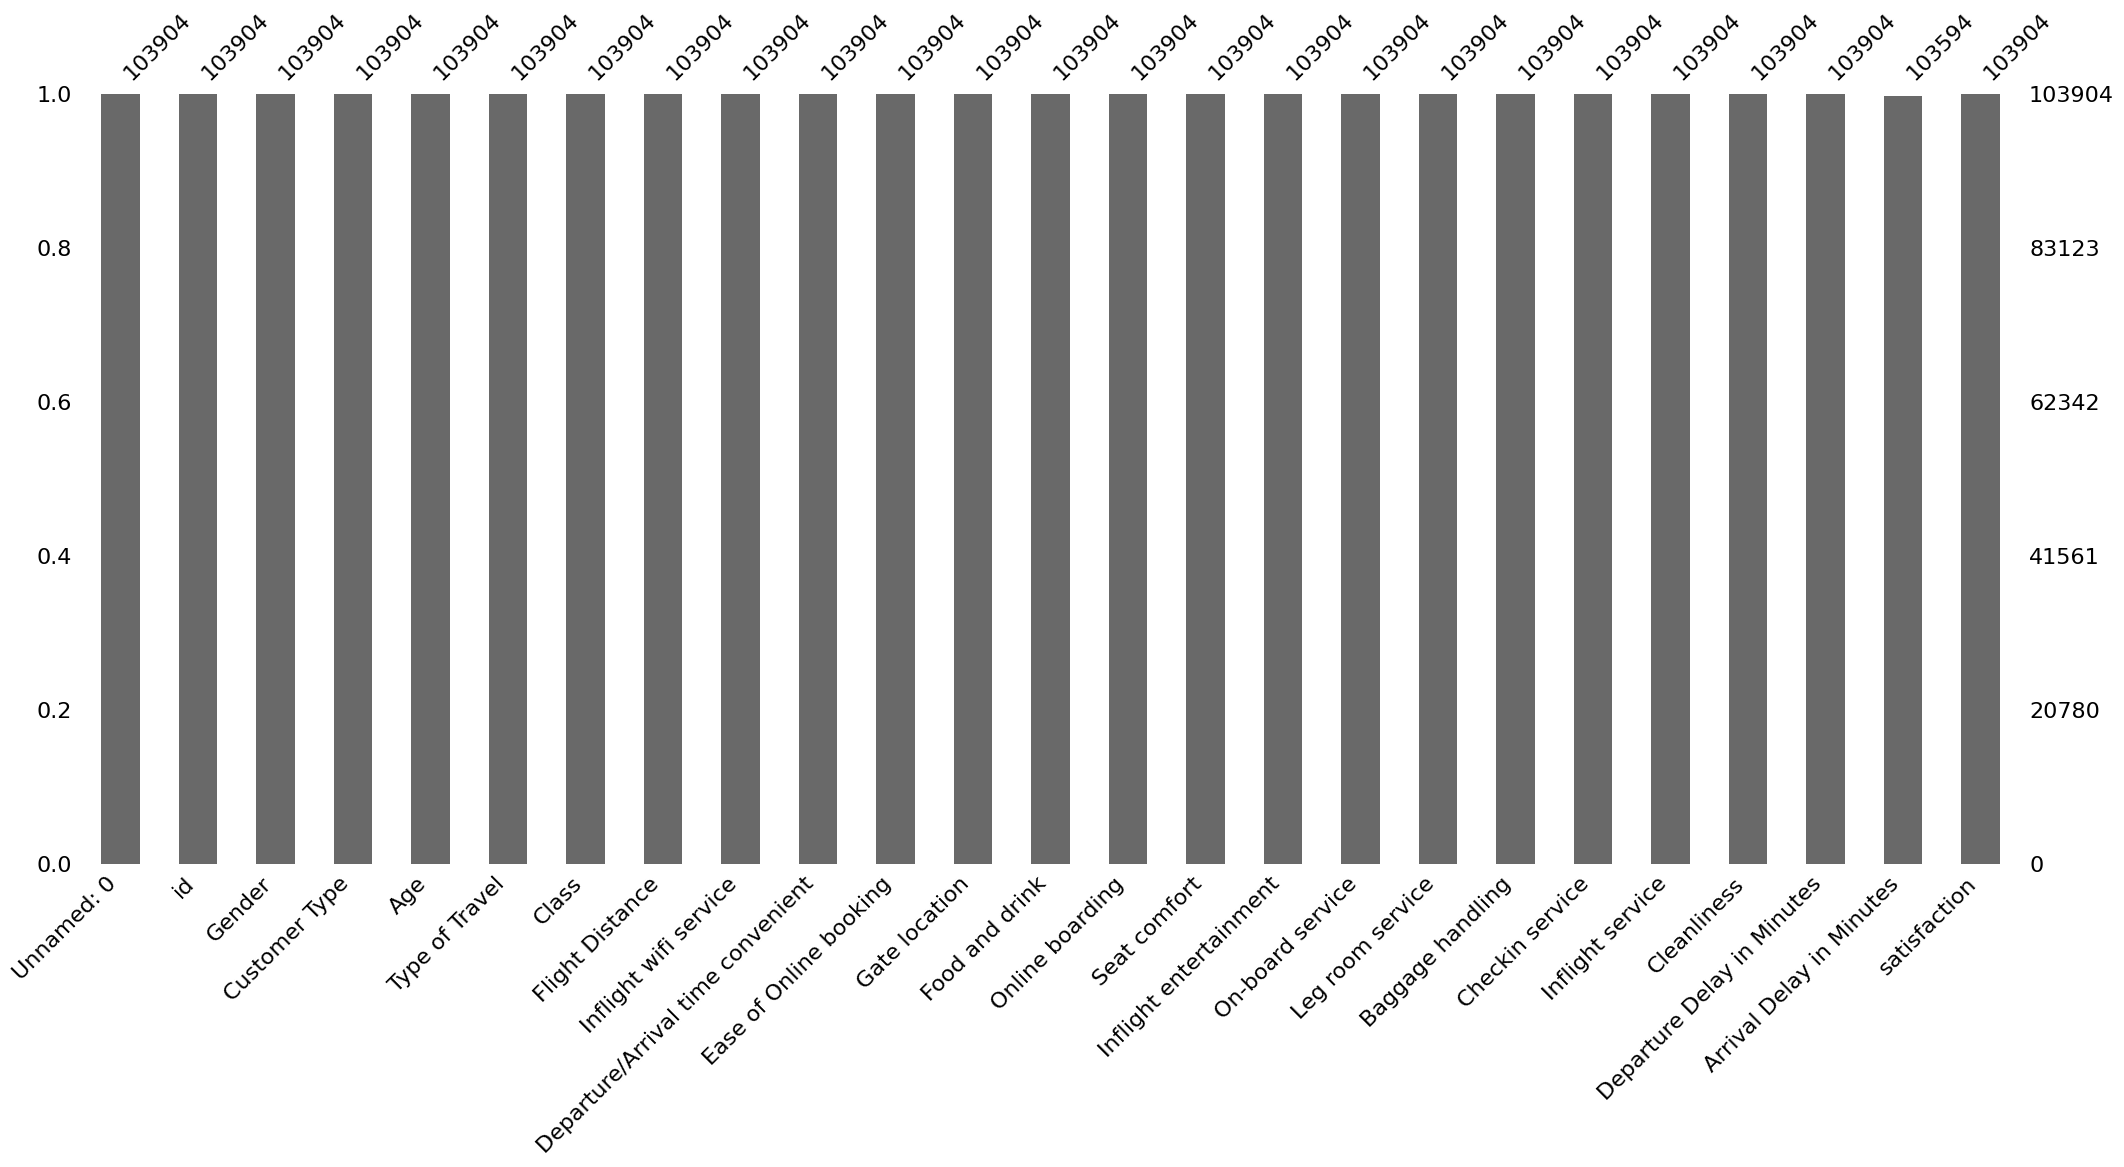

In [132]:
#Another way
msno.bar(df_copy)

In [133]:
#We look the first rows with nulls in this column
df_copy[df_copy['Arrival Delay in Minutes'].isna()].head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied


Considering this information into account, nulls in this column will be deleted.

In [134]:
#Deleting nulls in this column
df_copy = df_copy.dropna(subset=['Arrival Delay in Minutes'])

In [135]:
#Verifying that the changes have been made
shape = df_copy.shape

#Counting null values per column
null_columns=df_copy.columns[df_copy.isnull().any()]
nulls = df_copy[null_columns].isnull().sum()


print(shape)
print('Nulls: ', nulls)


(103594, 25)
Nulls:  Series([], dtype: float64)


There is no nulls in the dataset now.

#7. COLUMNS ARE MODIFIED

In [136]:
#The index column is dropped because we have two ways to identify it (id column and dataframe index)
df_copy = df_copy.drop('Unnamed: 0', axis=1)

#Verifying the changes
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103594 non-null  int64  
 1   Gender                             103594 non-null  object 
 2   Customer Type                      103594 non-null  object 
 3   Age                                103594 non-null  int64  
 4   Type of Travel                     103594 non-null  object 
 5   Class                              103594 non-null  object 
 6   Flight Distance                    103594 non-null  int64  
 7   Inflight wifi service              103594 non-null  int64  
 8   Departure/Arrival time convenient  103594 non-null  int64  
 9   Ease of Online booking             103594 non-null  int64  
 10  Gate location                      103594 non-null  int64  
 11  Food and drink                     103594 no

#8. COLUMN TYPING

In [137]:
#Columns 'object' are changed into 'string' type
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        df_copy[col] = df_copy[col].astype('string')

#Verifying the changes
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103594 non-null  int64  
 1   Gender                             103594 non-null  string 
 2   Customer Type                      103594 non-null  string 
 3   Age                                103594 non-null  int64  
 4   Type of Travel                     103594 non-null  string 
 5   Class                              103594 non-null  string 
 6   Flight Distance                    103594 non-null  int64  
 7   Inflight wifi service              103594 non-null  int64  
 8   Departure/Arrival time convenient  103594 non-null  int64  
 9   Ease of Online booking             103594 non-null  int64  
 10  Gate location                      103594 non-null  int64  
 11  Food and drink                     103594 no

#9. FEATURE ENGINEERING

All categorical columns but 'Class' are changed with LabelEncoding (because there are only two values and no dimensionality is added).

Class is changed into OrdinalEncoding because it follows an order:

'Eco' < 'Eco Plus' < 'Business'

In [138]:
#GENDER
#Aplying Label Encoding
label_encoder = LabelEncoder()
df_copy['Gender_label'] = label_encoder.fit_transform(df_copy['Gender'])

#print("\nDataFrame con Label Encoding:")
#print(df_copy)

#Labels - Values
print("\nValues in Label Encoding:")
for clase, valor in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{clase} → {valor}")


Values in Label Encoding:
Female → 0
Male → 1


In [139]:
#CUSTOMER TYPE
#Aplying Label Encoding
label_encoder = LabelEncoder()
df_copy['Customer_label'] = label_encoder.fit_transform(df_copy['Customer Type'])

#print("\nDataFrame con Label Encoding:")
#print(df_copy)

#Labels - Values
print("\nValues in Label Encoding:")
for clase, valor in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{clase} → {valor}")


Values in Label Encoding:
Loyal Customer → 0
disloyal Customer → 1


In [140]:
#TYPE OF TRAVEL
#Aplying Label Encoding
label_encoder = LabelEncoder()
df_copy['Type_Travel_label'] = label_encoder.fit_transform(df_copy['Type of Travel'])

#print("\nDataFrame con Label Encoding:")
#print(df_copy)

#Labels - Values
print("\nValues in Label Encoding:")
for clase, valor in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{clase} → {valor}")


Values in Label Encoding:
Business travel → 0
Personal Travel → 1


In [141]:
#SATISFACTION
#Aplying Label Encoding
label_encoder = LabelEncoder()
df_copy['Satisfaction_label'] = label_encoder.fit_transform(df_copy['satisfaction'])

#Labels - Values
print("\nValues in Label Encoding:")
for clase, valor in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{clase} → {valor}")


Values in Label Encoding:
neutral or dissatisfied → 0
satisfied → 1


In [142]:
#Order (Eco < Eco Plus < Business)
class_orden = ['Eco', 'Eco Plus', 'Business']

#Fit the codifier (ajustar el codificador)
ordinal_encoder = OrdinalEncoder(categories=[class_orden])
#Fit transform (transform each category into the value in order)
df_copy['Class_Ordinal'] = ordinal_encoder.fit_transform(df_copy[['Class']])

#Categories - order
print("\nOrder in Ordinal Encoding:")
for value, code in zip(ordinal_encoder.categories_[0],
                       range(len(ordinal_encoder.categories_[0]))):
    print(f"{value} → {code}")


Order in Ordinal Encoding:
Eco → 0
Eco Plus → 1
Business → 2


In [143]:
#Veryfing changes
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103594 non-null  int64  
 1   Gender                             103594 non-null  string 
 2   Customer Type                      103594 non-null  string 
 3   Age                                103594 non-null  int64  
 4   Type of Travel                     103594 non-null  string 
 5   Class                              103594 non-null  string 
 6   Flight Distance                    103594 non-null  int64  
 7   Inflight wifi service              103594 non-null  int64  
 8   Departure/Arrival time convenient  103594 non-null  int64  
 9   Ease of Online booking             103594 non-null  int64  
 10  Gate location                      103594 non-null  int64  
 11  Food and drink                     103594 no

In [144]:
df_copy.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_label,Customer_label,Type_Travel_label,Satisfaction_label,Class_Ordinal
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,25,18.0,neutral or dissatisfied,1,0,1,0,1.0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,4,1,1,6.0,neutral or dissatisfied,1,1,0,0,2.0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,5,0,0.0,satisfied,0,0,0,1,2.0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,4,2,11,9.0,neutral or dissatisfied,0,0,0,0,2.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,0,0.0,satisfied,1,0,0,1,2.0


#10. OUTLIERS

In [145]:
#Looking for outliers in numeric columns

#Selecting numeric columns
numeric_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns

#Detecting outliers
outliers_iqr = {}

for col in numeric_cols:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_copy[(df_copy[col] < lower) | (df_copy[col] > upper)]
    outliers_iqr[col] = outliers

    print(f"\nOutliers in {col} (IQR): {len(outliers)} outliers")
    print(outliers[[col]].head())


Outliers in id (IQR): 0 outliers
Empty DataFrame
Columns: [id]
Index: []

Outliers in Age (IQR): 0 outliers
Empty DataFrame
Columns: [Age]
Index: []

Outliers in Flight Distance (IQR): 2287 outliers
     Flight Distance
80              3960
173             3747
201             3854
215             3753
379             3995

Outliers in Inflight wifi service (IQR): 0 outliers
Empty DataFrame
Columns: [Inflight wifi service]
Index: []

Outliers in Departure/Arrival time convenient (IQR): 0 outliers
Empty DataFrame
Columns: [Departure/Arrival time convenient]
Index: []

Outliers in Ease of Online booking (IQR): 0 outliers
Empty DataFrame
Columns: [Ease of Online booking]
Index: []

Outliers in Gate location (IQR): 0 outliers
Empty DataFrame
Columns: [Gate location]
Index: []

Outliers in Food and drink (IQR): 0 outliers
Empty DataFrame
Columns: [Food and drink]
Index: []

Outliers in Online boarding (IQR): 0 outliers
Empty DataFrame
Columns: [Online boarding]
Index: []

Outliers in Seat 

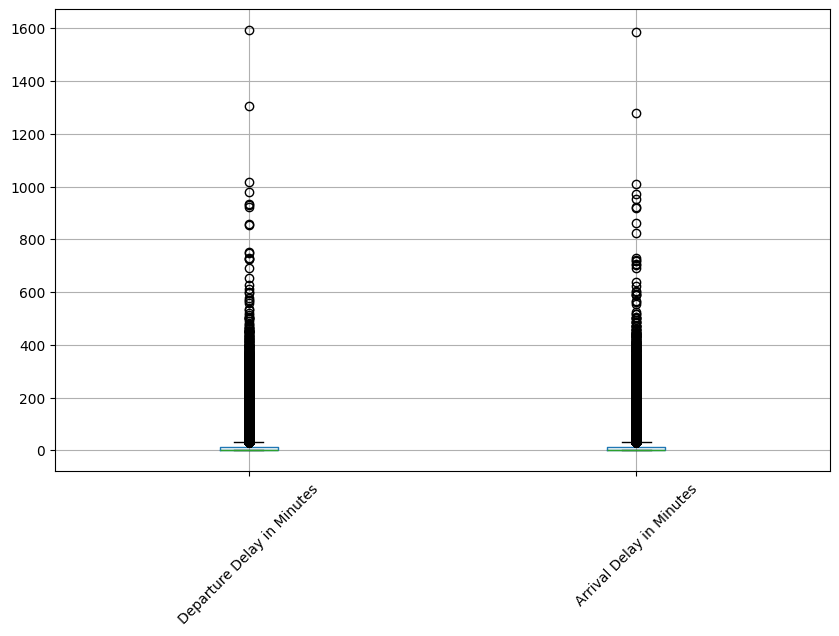

In [146]:
#We make boxplots for the columns with outliers

cols = ['Departure Delay in Minutes', 'Arrival Delay in Minutes', ]


plt.figure(figsize=(10, 6))
df_copy[cols].boxplot()
plt.xticks(rotation=45)
plt.show()

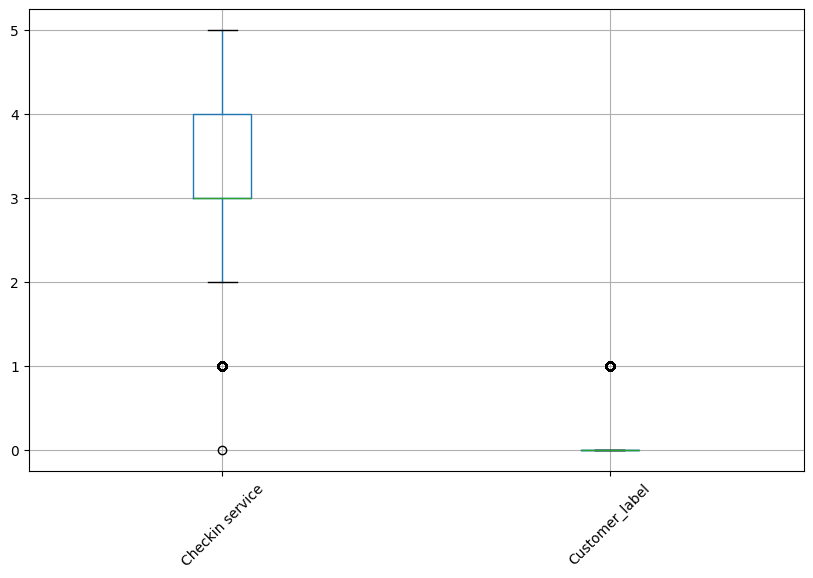

In [147]:
#We make boxplots for the columns with outliers

cols = ['Checkin service', 'Customer_label']


plt.figure(figsize=(10, 6))
df_copy[cols].boxplot()
plt.xticks(rotation=45)
plt.show()


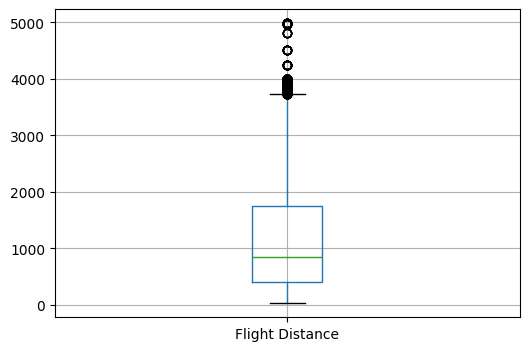

In [148]:
#Boxplot
plt.figure(figsize=(6, 4))
df_copy[['Flight Distance']].boxplot()
plt.show()


Different boxplots were made so it could be easier to analyse the outliers and decide if they should be deleted or not.

Outliers in:
- **Departure Delay in Minutes and Arrival Delay in Minutes** weren't deleted because it is part of the dataset. It's part of the data that a flight is delayed.
- **Flight distance** weren't deleted because it is part of the dataset. It's part of the data that a flight could travel very far.
- **Customer label** wasn't deleted because it is part of the dataset. This label can contain 0 or 1. There is nothing strange about this 1 value.
- **Checking Service** weren't deleted because it is part of the dataset. This column can be between 0 and 5.

##11. EXPORTING CLEANING FILE


In [149]:
#It is exported in csv format.
df_copy.to_csv('airline-predict-g4-cleaning.csv', index=False)


#For automatic download, delete # on the next line
#files.download('airline-predict-g4-cleaning2.csv')